In [17]:
%reset
import matplotlib
# matplotlib.use('Agg')
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

%matplotlib inline






Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  # This is added back by InteractiveShellApp.init_path()


In [18]:
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz

# def get_param_names(filename):
#     with open(filename,"r") as fi:
#         param_names = np.array((fi.readline()[1:].split())[:-4])
#     print param_names
#     return param_names


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8


def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)


s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97}    
stat_vars = ['cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8','cosmological_parameters--s8']
def get_mean_std_tension(fname, param_names=stat_vars, truth_dict=marker_dict):
    sf_name = open(fname, 'r')
    lines_all = sf_name.readlines()
    lines = lines_all[3:]
    mean_std = {}
    for j1 in range(len(param_names)):
        for i1 in range(len(lines)):
            first_line = lines[i1]
            first_line_split = first_line.split()
            sec_var = first_line_split[0]
            if sec_var == param_names[j1]:
                mean_std[sec_var] = np.array([float(first_line_split[1]),float(first_line_split[2])])
    out_dic = {}
    for param in param_names:
        mean, std = mean_std[param][0],mean_std[param][1]
        tension = np.abs(mean - truth_dict[param])/std
        out_dic[param] = tension
    
    return mean_std,out_dic





Removed no burn in
nsamp  =  593
data shape =  (593, 2)
weights shape =  (593,)
param names =  ['theory_yx--bpz0' 'theory_yx--bpalpha']
param names fancy =  ['$\\langle bP \\rangle (z=0)$' '$\\alpha(\\langle bP \\rangle)$']


Removed no burn in
nsamp  =  593
data shape =  (15360, 2)
weights shape =  (15360,)
param names =  ['theory_yx--bpz0' 'theory_yx--bpalpha']
param names fancy =  ['$\\langle bP \\rangle (z=0)$' '$\\alpha(\\langle bP \\rangle)$']


<Figure size 1152x864 with 0 Axes>

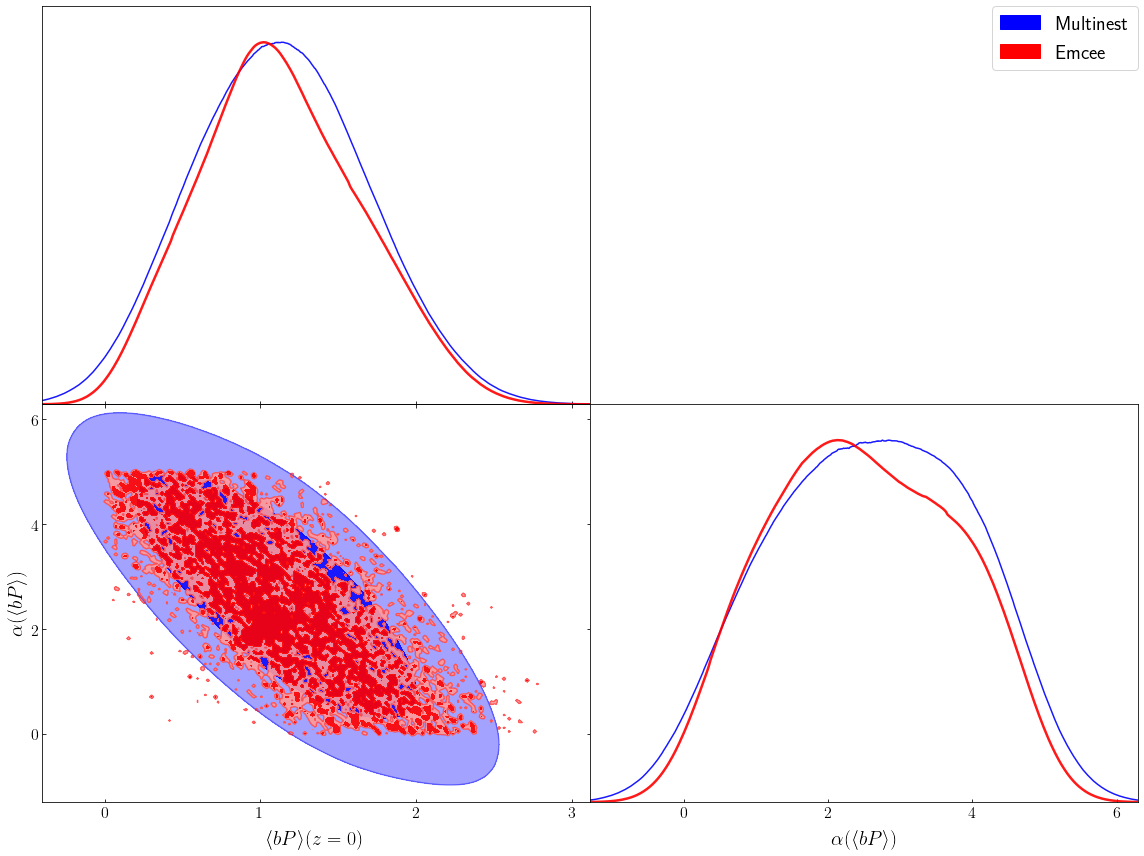

In [19]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)

filename_list = [
    '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/chains/chain_bP_linear_yshear_planckxdesy3_mn.txt',
    '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/chains/chain_bP_linear_yshear_planckxdesy3_emcee.txt',
]     


legend_labels = [r'Multinest',r'Emcee']
is_emcee = [0,1]

all_data = []
all_samples = []

fancy_dictionary = {'theory_yx--bpz0':r'$\langle bP \rangle (z=0)$','theory_yx--bpalpha':r'$\alpha(\langle bP \rangle)$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    if is_emcee[fi]:
        data = np.loadtxt(filename)
        weights = np.ones_like(np.loadtxt(filename)[:,-1])
    else:
        nsample = get_nsample(filename)
        data = np.loadtxt(filename)[-nsample:,:]
        weights = np.loadtxt(filename)[-nsample:,-1]

    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =16)
# g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
# s8v = 0.8430599612 * (0.3/0.3)**0.5
# marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.8430599612,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97, 'bias_lens--b3':1.7}    
g.triangle_plot(all_samples, legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'blue','alpha':0.9},{'lw':2.5,'color':'red','alpha':0.9},{'lw':2.5,'color':'black','alpha':0.75}],contour_args=[{'lw':2.5,'color':'blue','alpha':0.9},{'lw':2.5,'color':'red','alpha':0.9},{'lw':2.5,'color':'black','alpha':0.75}],contour_lws=[1.5],  filled = [True,  True,True], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  


# g.export(fname = 'compare_cosmo_lcdm_8_8-6-4_simple.pdf')
























In [20]:
filename = '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/chains/chain_bP_linear_yshear_planckxdesy3_emcee.txt'
data = np.loadtxt(filename)

ntot = data.shape[0]
ind_sel = np.random.randint(0,ntot, 1000)




In [42]:
# ind_bf = np.where(data[ind_sel,-1] == np.max(data[ind_sel,-1]))[0]
# print(ind_bf)
# print(data[ind_bf,:])

# ind_bf = np.where(data[:,-1] == np.max(data[:,-1]))[0]
# print(ind_bf)
# print(data[ind_bf,:])


[799]
[[  1.27180854   2.2955644   -2.7080502  -16.11498816]]


In [23]:
bpz0 = data[ind_sel,0]
bp_alpha = data[ind_sel,1]

z_array = np.linspace(0,1,100)

z_vlj = 0.15
bp_vlj = 1.5135
bp_vlj_yp = 1.72972
bp_vlj_yn = 1.28378

z_des = np.array([0.23915211970074815,0.38204488778054857,0.5256857855361595,0.6783042394014961])
bp_des = np.array([1.5135135135135136,2.472972972972973,3.851351351351351,2.6148648648648645])
bp_des_p = np.array([2.0270,3.04729,4.6351,3.9729729])
bp_des_n = np.array([0.93918918,1.8918,2.95945,1.445945])



In [30]:
np.array([bp_des_p-bp_des,bp_des-bp_des_n]).T.shape


(4, 2)

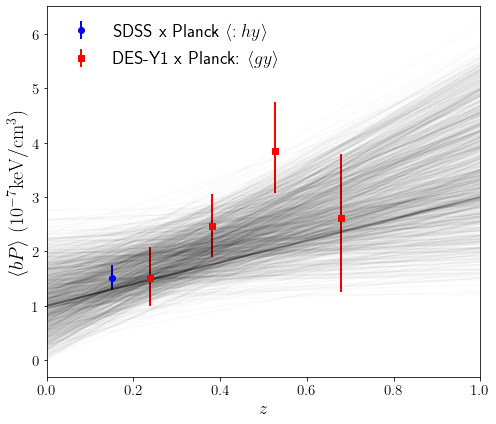

In [43]:
fig, ax = pl.subplots(1,1, figsize = (7,6))

for j in range(len(ind_sel)):
    bpzj = bpz0[j] + bp_alpha[j]*z_array
    ax.plot(z_array,  bpzj,alpha=0.02,color='black')
ax.errorbar(z_vlj,bp_vlj,yerr=np.array([[bp_vlj_yp-bp_vlj,bp_vlj-bp_vlj_yn]]).T,label=r'SDSS x Planck: $\langle hy \rangle$',ls='',marker='o',elinewidth=2.0,color='blue')
ax.errorbar(z_des,bp_des,yerr=np.array([bp_des_p-bp_des,bp_des-bp_des_n]),label=r'DES-Y1 x Planck: $\langle gy \rangle$',ls='',marker='s',elinewidth=2.0,color='red')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$z$', size = 18)
ax.set_ylabel(r'$\langle bP \rangle $   $(10^{-7} {\rm keV}/{{\rm cm}^3})$', size = 20)
# ax.set_ylim(1e-18,1e-10)
ax.set_xlim(0.0,1.0)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()














In [50]:
import pickle as pk
try:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk','rb'))
except:
    df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk','rb'),encoding='latin1')

xi_gty_data = df['mean'][80:]
xi_gty_cov = df['cov_total'][80:,:][:,80:]
xi_gty_sig = np.sqrt(np.diag(xi_gty_cov))


In [51]:
thf = np.loadtxt('/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/xi_gy_2h_bp.txt')
thf.shape


(20, 5)

In [52]:
df['xcoord_all']


(8, 20)

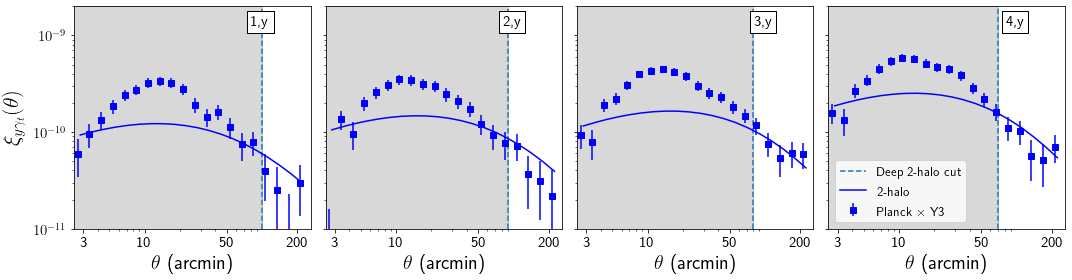

In [54]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


# file_names = ['/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory.pk',
# ]

# try:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/results.pkl','rb'))
# except:
#     df = pk.load(open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/results.pkl','rb'),encoding='latin1')

nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
hline_array = [100.,90.,80,70]
for j1 in range(1):    
    for j2 in range(4):
        wtheta_ygt_1 = thf[:,j2+1]
        
        theta = thf[:,0]
    
        if j1 == 0:            
            ax[j2].errorbar(theta, wtheta_ygt_1, ls='-',color='b',label=r'2-halo')
            ax[j2].axvline(hline_array[j2],ls='--',label='Deep 2-halo cut')
            ax[j2].axvspan(0,hline_array[j2],color='gray',alpha=0.3)
#             ax[j2].errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='B12/NFW')
#             ax[j2].errorbar(theta, wtheta_ygt_3, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = xi_gty_data[20*j2:20*(j2+1)]
            yk_th_g = df['xcoord_all'][j2,:]
            yk_err = xi_gty_sig[20*j2:20*(j2+1)]
            
#             yk_cov = df['Yshear_y3'][str(j2)]['cov']
#             inv_cov_bin = QR_inverse(yk_cov)
#             snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
#             print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



            ax[j2].set_ylim(1e-11,2e-9)


        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2.5,260))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_allbins_bPe_planckxy3.pdf')



















